

---

### Anshi's Part
Score: .78707

---



In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240212%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240212T203851Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D550f4c6eb1ca6a8e96c66b027a45107751447998ed68beacc70ffa9415ae1238930b68763b96c1c7d043ea693c454cde3e76ed0cca5a701e9312a69553e43e4815d66f0095ea4b3aed9216e9f48e5a3a2f726eb4560bbcc86107f00378aa971c8cd70c384b94c5f8697c8462055bb0a33697f73f77cc909592f0fb8f85c1baad4fb8d137d3f52f5abb83ae4fa2df35856c64ce416c68b1271845d8fa9036f47cb8bfd311355fd96c1cb64bb3d2503625589505620f6419fe02418cc41ca22ea149955f14e6e3bda94e619b36243b38f5d041247cb581c24c93ef764cc89d741f5194c160f2171627c6248ecf2886789f0abee95ad55f1cb924b0a1a5988d5c12'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34877 bytes downloaded
Downloaded and uncompressed: titanic
Data source import complete.


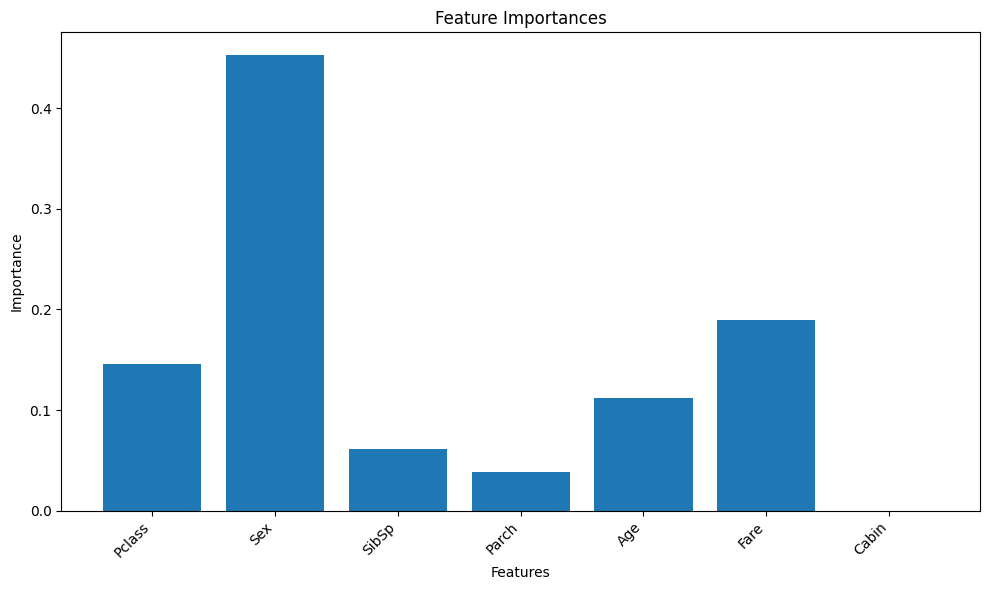

Your submission was successfully saved!
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
mean_age_train = train_data["Age"].mean()
mean_age_test = test_data["Age"].mean()

# Replace missing values in the "Age" column with the mean age
train_data["Age"].fillna(mean_age_train, inplace=True)
test_data["Age"].fillna(mean_age_test, inplace=True)
mean_age_train = train_data["Fare"].mean()
mean_age_test = test_data["Fare"].mean()

# Replace missing values in the "Age" column with the mean age
train_data["Fare"].fillna(mean_age_train, inplace=True)
test_data["Fare"].fillna(mean_age_test, inplace=True)
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Age","Fare", "Cabin"]
X = (train_data[features])
X_test = (test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
importances = model.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/submission(og).csv', index=False)
print("Your submission was successfully saved!")
print(output)



---


### ***Sangjun's Part*** 🙂 (Data Cleaning)
DONT RUN THE CELLS BEFORE THIS!

---




In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:

# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 100)
# If you want to see the whole dataframe with all the rows


train_data = pd.read_csv("/train.csv")
test_data = pd.read_csv("/test.csv")

# ######
# #Anshi's methods
# mean_age_train = train_data["Age"].median()
# mean_age_test = test_data["Age"].median()

# # Replace missing values in the "Age" column with the mean age
# train_data["Age"].fillna(mean_age_train, inplace=True)
# test_data["Age"].fillna(mean_age_test, inplace=True)
# #######

df = pd.concat(
    [
        train_data.drop(["PassengerId", "Survived"], axis=1),
        test_data.drop(["PassengerId"], axis=1),
    ]
)
y = train_data["Survived"]
df.isna().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [ ]:
#Drop Age and Cabin
df = df.drop(["Age","Cabin"],axis = 1)
# df = df.drop(["Cabin"],axis = 1)
print(df["Fare"].describe(),df["Embarked"].describe())
# Use mean for Fare and S for Embarked

KeyError: "['Age', 'Cabin'] not found in axis"

In [ ]:
df["Embarked"].fillna("S", inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

In [ ]:
# Extract Mr. Mrs. Miss and other titles:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"] = df["Title"].replace(["Ms", "Mlle"], "Miss")
df["Title"] = df["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df["Title"] = df["Title"].replace(["Dr", "Major", "Col", "Sir", "Rev", "Jonkheer", "Capt", "Don"], "Mr")
df = df.drop(["Name"], axis=1)
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
df[df["Title"] == "Master"]

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title
7,3,male,3,1,349909,21.0750,S,Master
16,3,male,4,1,382652,29.1250,Q,Master
50,3,male,4,1,3101295,39.6875,S,Master
59,3,male,5,2,CA 2144,46.9000,S,Master
63,3,male,3,2,347088,27.9000,S,Master
...,...,...,...,...,...,...,...,...
360,3,male,8,2,CA. 2343,69.5500,S,Master
379,3,male,4,2,347077,31.3875,S,Master
389,3,male,3,1,349909,21.0750,S,Master
392,3,male,0,2,C.A. 2673,20.2500,S,Master


In [ ]:
# Encode the categorical variables
df["Sex"] = df["Sex"].map({"male": 1, "female": 0}).astype(int)
df["Embarked"] = df["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)
df['Title'] = df['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}).astype(int)

In [ ]:
# df["TicketNumber"] = df["Ticket"].str.split()
# df["TicketNumber"] = df["TicketNumber"].str[-1]
# df["TicketNumber"] = LabelEncoder().fit_transform(df["TicketNumber"])
# The lines above are what the notebook I sent has but it seemed like too much so i just dropped the ticket column
df = df.drop(["Ticket"], axis=1)

In [ ]:
# New feature: family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
# df["IsAlone"] = df["FamilySize"].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
# Split back into train and test
# 890 rows for train and rest are test
X = df[:y.shape[0]]
X_test = df[y.shape[0]:]
# Making sure that train data has the same amount of entries as y
# train_test_split doesn't work here



---

### XGBoost
CV score: .838
Score: .78707

Score(Using Anshi's X and y): .7344

---



In [ ]:
#XGBoost
parameters = {
    'max_depth': [5, 7,8, 9, 10, 11],
    'n_estimators': [5, 10, 15, 18, 20,22, 25, 30],
    'learning_rate': [0.05, 0.06, 0.07,0.08, 0.09 ,0.1]
}

model_xgb = xgb.XGBClassifier(
    random_state=4,
)

model_xgb = GridSearchCV(
    model_xgb,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X, y)

print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_xgb.best_score_:.3f}'
)


Best parameters {'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 22}
Mean cross-validated accuracy score of the best_estimator: 0.843


In [ ]:
# Use the best parameters
parameters = {
    'max_depth': [8],
    'n_estimators': [22],
    'learning_rate': [0.05]
}
# Best parameters:
    # 'max_depth': [8],
    # 'n_estimators': [22],
    # 'learning_rate': [0.05]
model_xgb = xgb.XGBClassifier(
    random_state=4,
)

model_xgb = GridSearchCV(
    model_xgb,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X, y)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=4, ...),
             param_grid={'learning_rate': [0.05], 'max_depth': [8],
                         'n_estimators': [22]},
             scoring='accuracy')

In [ ]:
predictions = model_xgb.predict(X_test)
# from google.colab import drive
# drive.mount('/content/drive')
# Output csv:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
output.to_csv('/titanicsubmission(xgb w mr mrs miss).csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!




---

### Random Forest w/o parameter tuning
CV score: .827
Score 7799


---



In [ ]:
# mean_age_train = train_data["Age"].mean()
# mean_age_test = test_data["Age"].mean()

# # Replace missing values in the "Age" column with the mean age
# train_data["Age"].fillna(mean_age_train, inplace=True)
# test_data["Age"].fillna(mean_age_test, inplace=True)
# mean_age_train = train_data["Fare"].mean()
# mean_age_test = test_data["Fare"].mean()

# # Replace missing values in the "Age" column with the mean age
# train_data["Fare"].fillna(mean_age_train, inplace=True)
# test_data["Fare"].fillna(mean_age_test, inplace=True)
# features = ["Pclass", "Sex", "SibSp", "Parch","Age","Fare", "Cabin"]
# X = (train_data[features])
# X_test = (test_data[features])



model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model1.fit(X, y)
predictions = model1.predict(X_test)
importances = model1.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
cv_scores = cross_val_score(model1, X, y, cv=5)  # 5-fold cross-validation

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))




---

### Random Forest w/ parameter tuning
CV score: .832 \
Score: .77751 \
Score (Anshi's X and y): .607

---



In [ ]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 30],
    "max_depth": [3, 5, 6, 7, 8, 11],
}

model2 = RandomForestClassifier(random_state=1)

model2 = GridSearchCV(
    model2,
    parameters,
    cv=5,
    scoring='accuracy',
)

model2.fit(X, y)


print('-----')
print(f'Best parameters {model2.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model2.best_score_:.3f}'
)
print('-----')

In [ ]:
model2 = RandomForestClassifier(n_estimators=15, max_depth=7, random_state=1) #Sangjun's X and y
# model2 = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=1)
model2.fit(X, y)
predictions = model2.predict(X_test)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# Output csv:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/titanicsubmission(rf).csv', index=False)
print("Your submission was successfully saved!")
print(output)



---


# Logistic Regression
CV_score = .806
Score = .758

---



In [ ]:
# Normalizing cat columns for gradient boosting
one_hot_cols = ["Embarked", "Title"]
for col in one_hot_cols:
    df = pd.concat(
        [df, pd.get_dummies(df[col], prefix=col)],
        axis=1,
        join="inner",
    )
df = df.drop(one_hot_cols, axis=1)


In [ ]:
scaler = StandardScaler()
df.loc[:] = scaler.fit_transform(df)
X_train_norm = df[:y.shape[0]]
X_test_norm = df[y.shape[0]:]

In [ ]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=1,
    class_weight="balanced",
    solver="liblinear",
)

model_logistic_regression = GridSearchCV(
    model_logistic_regression,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_logistic_regression.fit(X_train_norm, y)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_logistic_regression.best_score_:.3f}'
)
print('-----')

In [ ]:
parameters = {
    "C": [0.1],
    "penalty": ["l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=1,
    class_weight="balanced",
    solver="liblinear",
)

model_logistic_regression = GridSearchCV(
    model_logistic_regression,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_logistic_regression.fit(X_train_norm, y)
predictions = model_logistic_regression.predict(X_test_norm)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# Output csv:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/titanicsubmission(log reg).csv', index=False)
print("Your submission was successfully saved!")
print(output)

Your submission was successfully saved!
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


# Yihao (you can start to run form here)
combination of what we've done previously


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
from sklearn.model_selection import cross_val_score

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240212%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240212T203851Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D550f4c6eb1ca6a8e96c66b027a45107751447998ed68beacc70ffa9415ae1238930b68763b96c1c7d043ea693c454cde3e76ed0cca5a701e9312a69553e43e4815d66f0095ea4b3aed9216e9f48e5a3a2f726eb4560bbcc86107f00378aa971c8cd70c384b94c5f8697c8462055bb0a33697f73f77cc909592f0fb8f85c1baad4fb8d137d3f52f5abb83ae4fa2df35856c64ce416c68b1271845d8fa9036f47cb8bfd311355fd96c1cb64bb3d2503625589505620f6419fe02418cc41ca22ea149955f14e6e3bda94e619b36243b38f5d041247cb581c24c93ef764cc89d741f5194c160f2171627c6248ecf2886789f0abee95ad55f1cb924b0a1a5988d5c12'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34877 bytes downloaded
Downloaded and uncompressed: titanic
Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

Encode cabin
def encode_cabin(cabin):
    if pd.isna(cabin):
        return 0
    prefix = cabin[0]  # Get the first letter
    if prefix == 'A':
        return 1
    elif prefix == 'B':
        return 2
    elif prefix == 'C':
        return 3
    elif prefix == 'D':
        return 4
    elif prefix == 'E':
        return 5
    elif prefix == 'F':
        return 6
    elif prefix == 'G':
        return 7
    elif prefix == 'H':
        return 8
    else:
        return 9

Apply the function to the Cabin column
train_data['Cabin'] = train_data['Cabin'].apply(encode_cabin)
test_data['Cabin'] = test_data['Cabin'].apply(encode_cabin)


In [ ]:
df = pd.concat(
    [
        train_data.drop(["PassengerId", "Survived"], axis=1),
        test_data.drop(["PassengerId"], axis=1),
    ]
)
y = train_data["Survived"]
df.isna().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [ ]:
print(df["Fare"].describe(),df["Embarked"].describe(), df["Age"].describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64 count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


In [ ]:
# Clean NAs for "Embarked", "Fare", "Age"
df["Embarked"].fillna("S", inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [ ]:
# Clean "Title"
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"] = df["Title"].replace(["Ms", "Mlle"], "Miss")
df["Title"] = df["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df["Title"] = df["Title"].replace(["Dr", "Major", "Col", "Sir", "Rev", "Jonkheer", "Capt", "Don"], "Mr")
df = df.drop(["Name"], axis=1)
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
# Encode the categorical variables
df["Sex"] = df["Sex"].map({"male": 1, "female": 0}).astype(int)
df["Embarked"] = df["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)
df['Title'] = df['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}).astype(int)

In [ ]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [ ]:
# Drop unneccessary variables
df = df.drop(["Ticket"], axis=1)
df = df.drop(["Cabin"], axis=1)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,1,22.0,1,0,7.2500,1,0,2
1,1,0,38.0,1,0,71.2833,2,2,2
2,3,0,26.0,0,0,7.9250,1,1,1
3,1,0,35.0,1,0,53.1000,1,2,2
4,3,1,35.0,0,0,8.0500,1,0,1


In [ ]:
# Split train and test data again
train_data_length = len(train_data)
X = df.iloc[:train_data_length]
X_test = df.iloc[train_data_length:]

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,1,22.0,1,0,7.2500,1,0,2
1,1,0,38.0,1,0,71.2833,2,2,2
2,3,0,26.0,0,0,7.9250,1,1,1
3,1,0,35.0,1,0,53.1000,1,2,2
4,3,1,35.0,0,0,8.0500,1,0,1


## Some plots

In [ ]:
def mean_median_plot(df,column):
  mean = df[column].mean()
  median = df[column].median()
  plt.figure(figsize = (15,10))
  sns.histplot(df[column], kde=True);
  plt.axvline(mean,color='b', linestyle='--',label="mean")
  plt.axvline(median,color='red',label="median")
  plt.legend()

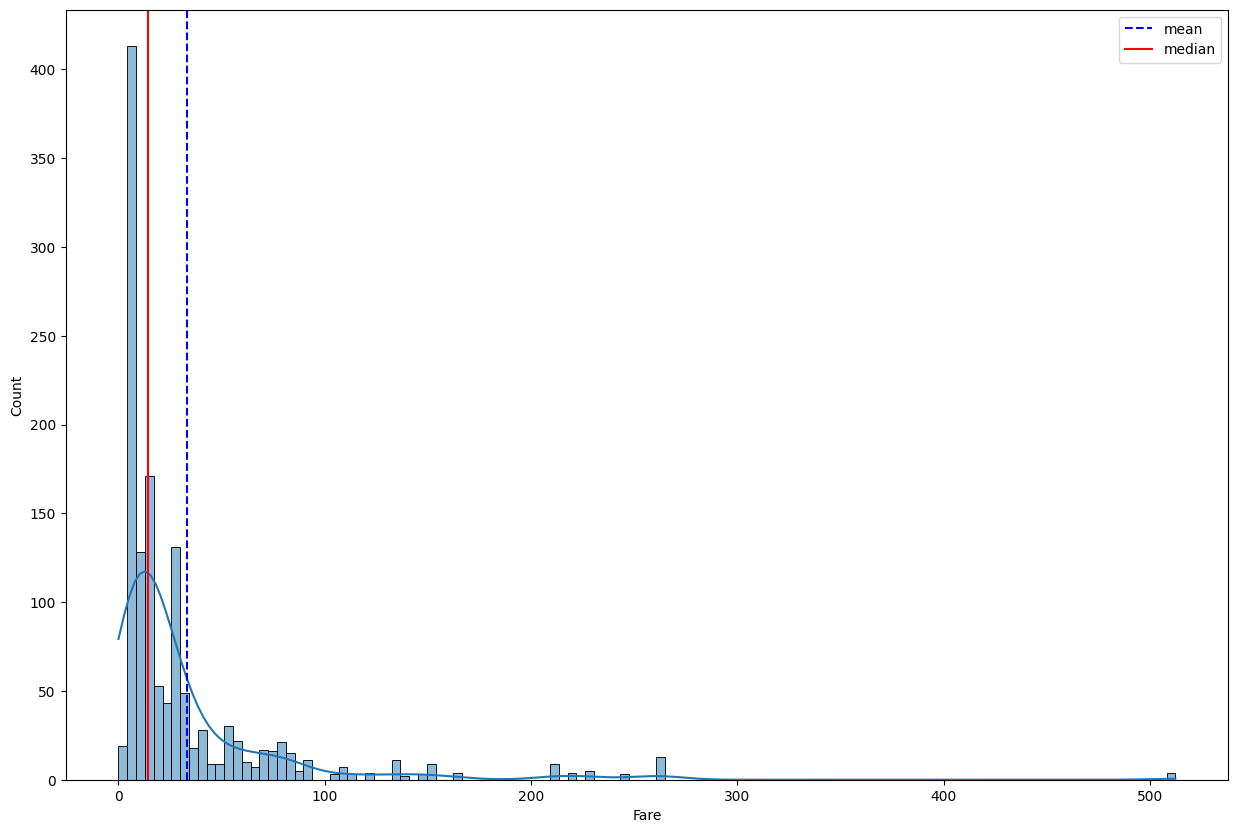

In [ ]:
import seaborn as sns
mean_median_plot(df,"Fare")

<Axes: xlabel='Embarked', ylabel='count'>

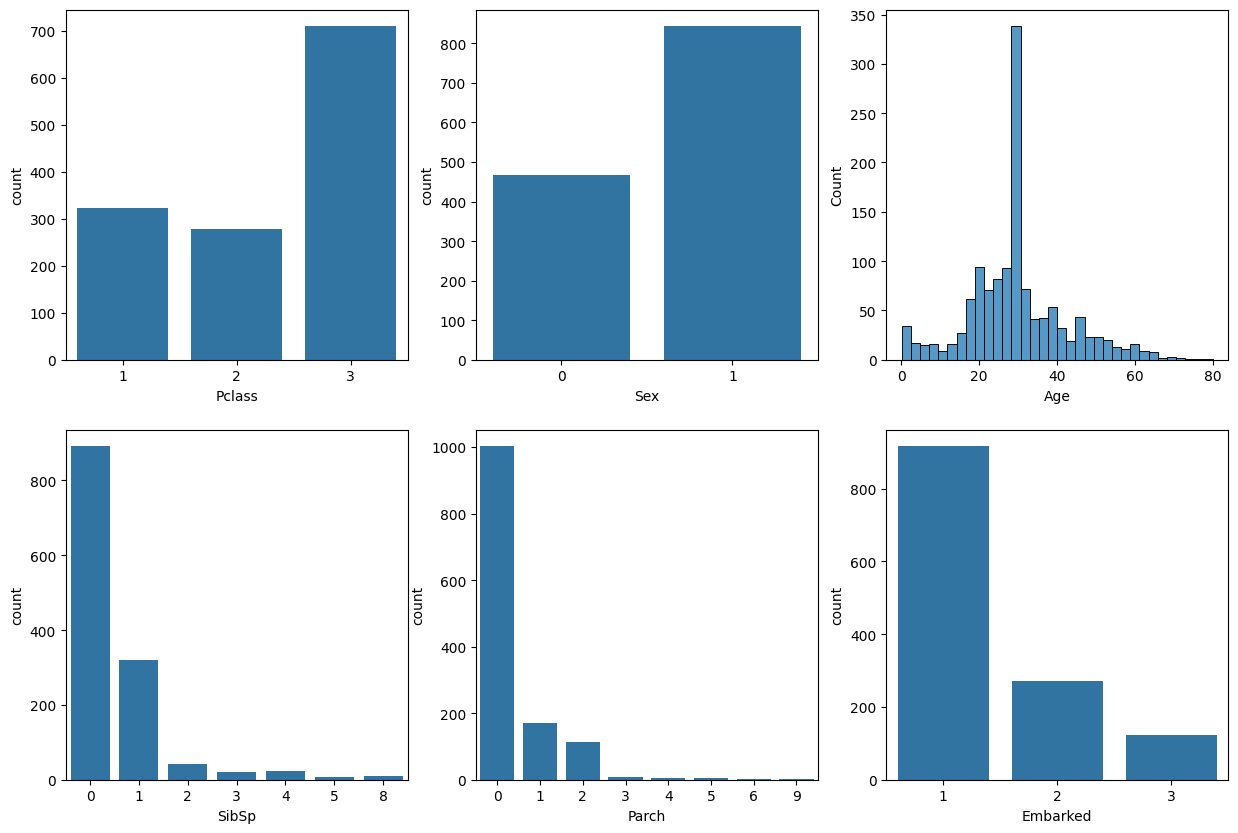

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='Pclass', data=df)

plt.subplot(2, 3, 2)
sns.countplot(x='Sex', data=df)

plt.subplot(2, 3, 3)
sns.histplot(x='Age', data=df)

plt.subplot(2, 3, 4)
sns.countplot(x='SibSp', data=df)

plt.subplot(2, 3, 5)
sns.countplot(x='Parch', data=df)

plt.subplot(2, 3, 6)
sns.countplot(x='Embarked', data=df)

## Machine learning

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,1,22.0,1,0,7.2500,1,0,2
1,1,0,38.0,1,0,71.2833,2,2,2
2,3,0,26.0,0,0,7.9250,1,1,1
3,1,0,35.0,1,0,53.1000,1,2,2
4,3,1,35.0,0,0,8.0500,1,0,1


### Ramdom forest

CV scores: 0.835007

Kaggle scores: 0.77751


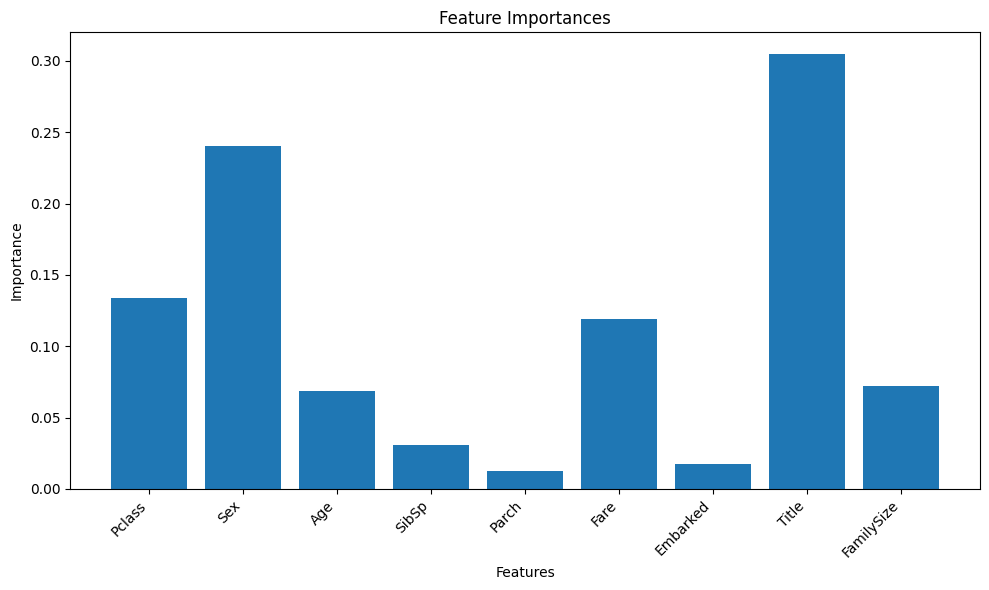

Your submission was successfully saved!
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
importances = model.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/submission(rf_com).csv', index=False)
print("Your submission was successfully saved!")
print(output)

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.84357542 0.8258427  0.8258427  0.80337079 0.85955056]
Mean CV Score: 0.8316364321134895


### XGBoost
CV scores: 0.835007

Kaggle scores: 0.76315

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
#XGBoost
parameters = {
    'max_depth': [5, 7,8, 9, 10, 11],
    'n_estimators': [5, 10, 15, 18, 20,22, 25, 30],
    'learning_rate': [0.05, 0.06, 0.07,0.08, 0.09 ,0.1]
}

model_xgb = xgb.XGBClassifier(
    random_state=4,
)

model_xgb = GridSearchCV(
    model_xgb,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X, y)

print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' +
    f'{model_xgb.best_score_:.3f}'
)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7c7a8b9a7850>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 641, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 557, in _handle_exception
    return fn()
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/data.py", line 1280, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy

KeyboardInterrupt: 

In [ ]:
# Use the best parameters
parameters = {
    'max_depth': [8],
    'n_estimators': [22],
    'learning_rate': [0.05]
}
# Best parameters:
    # 'max_depth': [8],
    # 'n_estimators': [22],
    # 'learning_rate': [0.05]
model_xgb = xgb.XGBClassifier(
    random_state=4,
)

model_xgb = GridSearchCV(
    model_xgb,
    parameters,
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=4, ...),
             param_grid={'learning_rate': [0.05], 'max_depth': [8],
                         'n_estimators': [22]},
             scoring='accuracy')

In [ ]:
predictions = model_xgb.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/titanicsubmission(xgb_com).csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
cv_scores = cross_val_score(model_xgb, X, y, cv=5)  # 5-fold cross-validation

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.8603352  0.82022472 0.87078652 0.79775281 0.83707865]
Mean CV Score: 0.837235578431988
